In [ ]:
library(tidyverse)
library(data.table)
library(lubridate)
library(RPostgres)
library(zoo)
library(weathermetrics)
library(readxl)
options(repr.plot.width=15)
options(repr.plot.height=8)

In [2]:
x2017 <- fread('~/hakmar/2017.csv',dec = '.')
x2018 <- fread('~/hakmar/2018.csv',dec = '.')
x2019 <- fread('~/hakmar/2019.csv',dec = '.')
x2020 <- fread('~/hakmar/2020.csv',dec = '.')
x2021 <- fread('~/hakmar/2021.csv',dec = '.')
colname <- fread('~//hakmar_fulldata.csv',nrows = 1)
data <- list(x2017,x2018,x2019,x2020,x2021) %>% rbindlist
colnames(data) <- names(colname)[2:11]
ozel_gun_anlam <- fread('~/hakmar/Ozel_gunler.csv')
stok <- fread('~//hakmar/Stoklar.csv') %>% mutate(stok_kodu=V1,urun=paste(V17,V2)) %>% select(stok_kodu,urun)
colnames(ozel_gun_anlam) <- c('ozel_gun','ozel_gun_metin')
data[,tarih:=ymd_hms(tarih)]
data[,yil:=as.factor(year(tarih))]
data <- data %>%
left_join(ozel_gun_anlam,by='ozel_gun') %>%
left_join(stok,by='stok_kodu') %>%
mutate(arefe=ifelse(ozel_gun==1 | ozel_gun==2,1,0),
       yilbasi=ifelse(ozel_gun==6,1,0),
       asure=ifelse(ozel_gun==4,1,0))

In [4]:
stok

stok_kodu,urun
<chr>,<chr>
46652,HALIS KURUYEMIS ACIK ANTEP FISTIK LUX KG
108156,TATBAK CEREZIM 150GR ANTEP FISTIK
601263,PEYMAN KURUYEMIS PEYMAN BAHCEDEN 145GR ANTEP FISTIGI
606537,PEYMAN KURUYEMIS PEYMAN FISTIKCI MISTIK ANTEP FISTIK 185GR
3776,TADIM KURUYEMIS TADIM 140GR ANTEP FISTIGI
607163,TADIM KURUYEMIS TADIM 90GR ANTEP FISTIGI
107434,HALIS KURUYEMIS ACIK FISTIK SIIRT KG*
36446,HALIS KURUYEMIS ACIK BADEM ICI KG
109228,HALIS KURUYEMIS ACIK KABUKLU BADEM


In [13]:
yday('2016-02-04')

[1] 35

`summarise()` has grouped output by 'tarih'. You can override using the `.groups` argument.



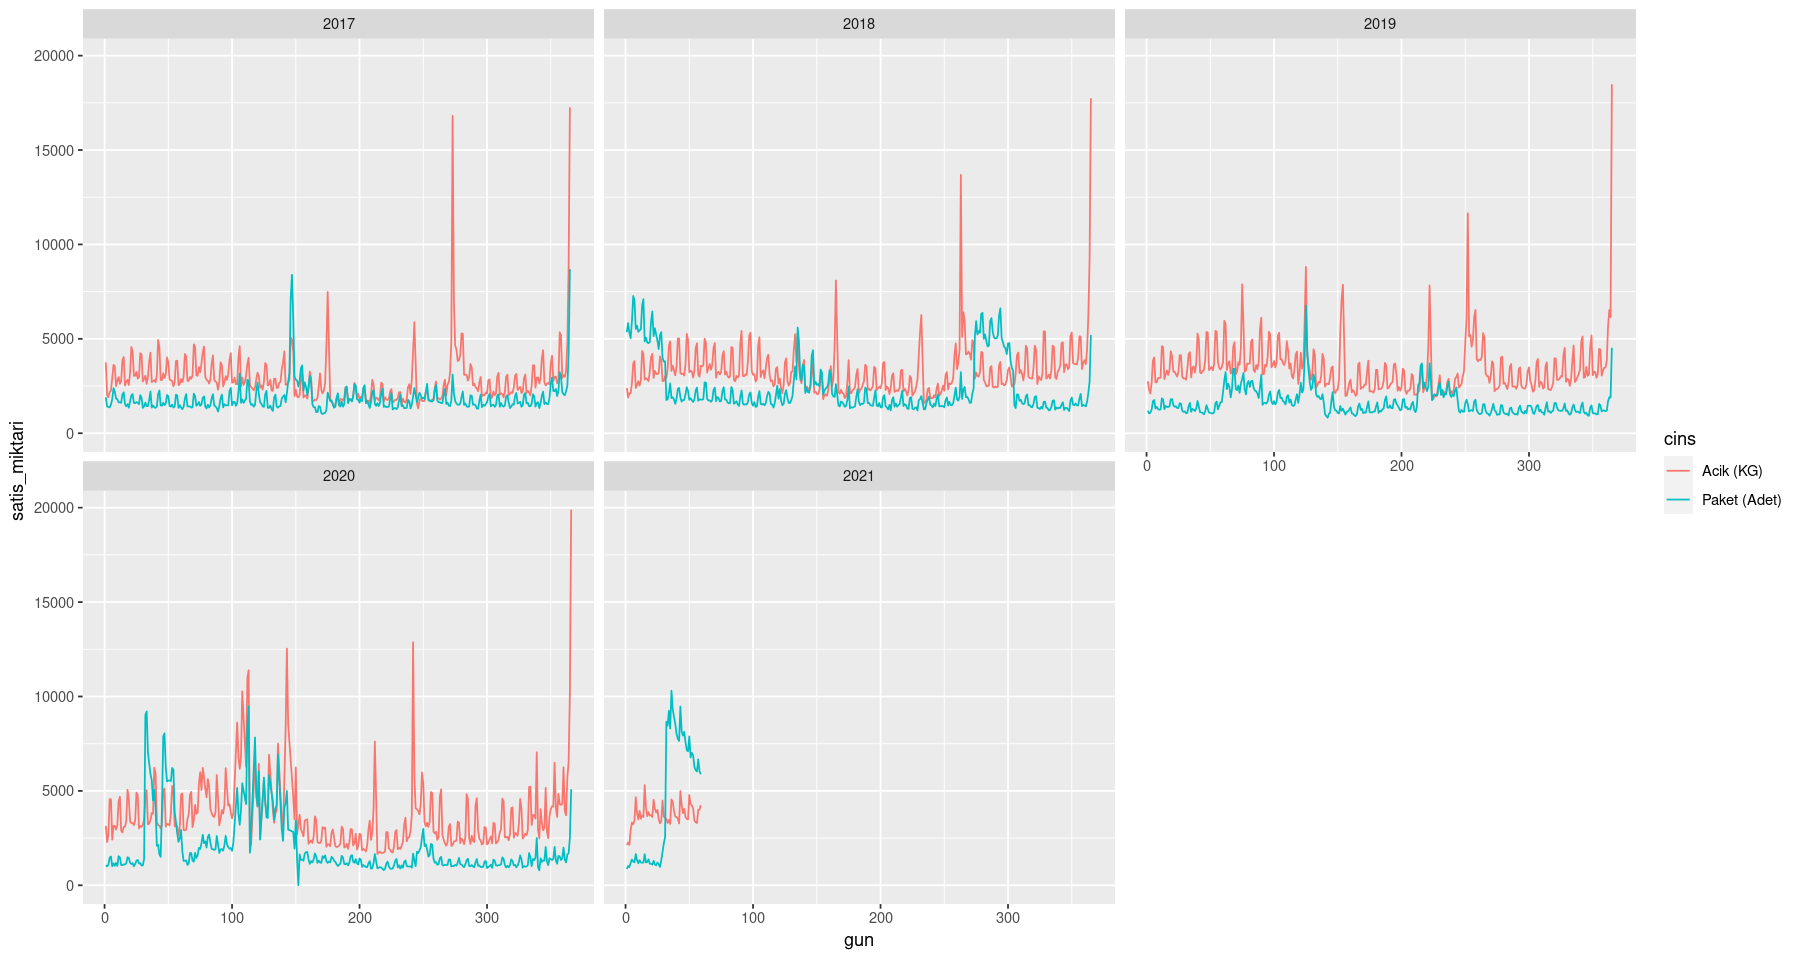

In [17]:
data %>%
select(tarih,stok_kodu,satis_miktari) %>%
left_join(stok,by='stok_kodu') %>% 
mutate(cins=ifelse(grepl('ACIK',urun),'Acik (KG)','Paket (Adet)')) %>% 
select(tarih,cins,satis_miktari) %>% 
group_by(tarih,cins) %>% 
summarise(satis_miktari=sum(satis_miktari)) %>% 
ungroup %>% 
mutate(yil=year(tarih),gun=yday(tarih)) %>% 
ggplot(aes(x=gun,y=satis_miktari))+
geom_line(aes(color=cins))+
facet_wrap(~yil)


In [24]:
data %>%
group_by(magaza_no,stok_kodu,tarih,insert,teshir,arefe,yilbasi,asure) %>% 
summarise(satis=sum(satis_tutari)) %>%
as.data.table -> manipulated

`summarise()` has grouped output by 'magaza_no', 'stok_kodu', 'tarih', 'insert', 'teshir', 'arefe', 'yilbasi'. You can override using the `.groups` argument.



In [25]:
gunler <- data.table(gun=1:7,
                     hafta_gun=c('Pazartesi','Sali','Carsamba','Persembe','Cuma','Cumartesi','Pazar'))

In [26]:
hava <- fread('~/hakmar/temp.csv') %>%
select(DATE,TAVG) %>%
mutate(DATE=ymd(DATE),TAVG=fahrenheit.to.celsius(TAVG)) %>%
rename(ort_sicaklik=TAVG,tarih=DATE)

In [27]:
yagmur <- fread('~//hakmar/yagmur.csv') %>%
select(date,rain_drizzle) %>% 
rename(yagmur=rain_drizzle,tarih=date) %>%
mutate(tarih=ymd(tarih))

In [28]:
manipulated %>%
mutate(gun=wday(tarih),
       ay=month(tarih),
       hafta=isoweek(tarih)) %>%
left_join(gunler,by='gun') %>% 
select(-gun) %>%
left_join(hava,by='tarih') %>%
left_join(yagmur,by='tarih') %>% 
mutate(yagmur=ifelse(is.na(yagmur),0,yagmur)) %>% 
mutate(ort_sicaklik=na.approx(ort_sicaklik)) -> tidy_hakmar

In [29]:
tidy_hakmar %>% fwrite('~/hakmar/hakmar_tidy_features.csv',row.names = F,sep = '|')

In [30]:
tidy_hakmar %>% head(5)

magaza_no,stok_kodu,tarih,insert,teshir,arefe,yilbasi,asure,satis,ay,hafta,hafta_gun,ort_sicaklik,yagmur
<int>,<chr>,<dttm>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2,106353,2018-01-15,0,0,0,0,0,0.00000,1,3,Sali,5.56,0
2,106353,2018-01-18,0,0,0,0,0,10.87037,1,3,Cuma,7.22,1
2,106353,2018-01-19,0,0,0,0,0,13.72222,1,3,Cumartesi,7.78,0
2,106353,2018-01-25,0,0,0,0,0,0.00000,1,4,Cuma,3.89,1
2,106353,2018-01-27,0,0,0,0,0,12.16667,1,4,Pazar,4.44,0


In [ ]:
data %>% select(tarih,ozel_gun) %>% left_join(ozel_gun_anlam,by='ozel_gun')

In [38]:
data
group_by(tarih) %>% 
summarise(gunluk_ciro=sum(satis_tutari)) %>%
ungroup %>% 
mutate(yil = as.factor(year(tarih)),day=yday(tarih)) %>%
mutate(ozel_gun=as.factor(ozel_gun)) -> full

full %>%
na.omit %>% 
left_join(ozel_gun_anlam %>%
          mutate(gun=as.factor(V2),V1=as.factor(V1))
          ,by=c('ozel_gun'='V1')) -> full_ozel

full %>%
ggplot(aes(x=day,y=gunluk_ciro))+
geom_line(aes(color=yil))+
geom_smooth(aes(color=yil,alpha=0.4))+
geom_point(data = full_ozel,aes(shape=gun,fill=gun),show.legend = T)+
scale_shape_manual(values = seq(1,8))+
facet_wrap(~yil)+
xlab('1-365 Arası Günler')+
ylab('Günlük Ciro')

tarih,magaza_no,stok_kodu,satis_miktari,satis_tutari,stok_miktari,satis_fiyati,insert,teshir,ozel_gun,yil,ozel_gun_metin,urun,arefe,yilbasi,asure
<dttm>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2017-01-01,2,106999,0.788,17.444444,79.92,22.1296,0,0,0,2017,NA,HALIS KURUYEMIS ACIK LUX KARISIK KURUYEMIS KG,0,0,0
2017-01-01,2,107276,1.000,1.388889,4.00,1.8519,0,0,0,2017,NA,TADIM KURUYEMIS TADIM TADIMCA 30GR FINDIKLI,0,0,0
2017-01-01,2,108163,1.000,1.527778,167.00,1.8056,0,0,0,2017,NA,TATBAK CEREZIM 150GR ALACA CEKIRDEK,0,0,0
2017-01-01,2,108164,3.000,9.027778,88.00,3.6574,0,0,0,2017,NA,TATBAK CEREZIM 200GR KABAK CEKIRDEK *,0,0,0
2017-01-01,2,108166,1.000,3.379630,19.00,3.9352,0,0,0,2017,NA,TATBAK CEREZIM 200GR SARI LEBLEBI,0,0,0
2017-01-01,2,108168,1.000,2.083333,27.00,2.2685,0,0,0,2017,NA,TATBAK CEREZIM 150GR SOSLU MISIR,0,0,0
2017-01-01,2,108171,4.000,10.925926,70.00,2.7315,0,0,0,2017,NA,TATBAK CEREZIM 250GR ALACA CEKIRDEK*,0,0,0
2017-01-01,2,109251,1.432,50.250000,77.48,39.7222,0,0,0,2017,NA,HALIS KURUYEMIS ACIK LUX EKSTRA KARISIK KURUYEMIS KG,0,0,0
2017-01-01,2,109372,5.000,4.629630,156.00,0.9259,0,0,0,2017,NA,TADIM KURUYEMIS TADIM 37GR AYCEKIRDEGI BOL TUZLU,0,0,0


ERROR: Error in group_by(tarih): object 'tarih' not found


In [32]:
ggsave('gercekciro5.png',height = 8,width = 15)